In [1]:
%matplotlib inline
import torch
from utils import load_wav_to_torch
import layers
from hparams import create_hparams
from plotting_utils import plot_spectrogram_to_numpy
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from PIL import Image

In [2]:
hparams = create_hparams()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
stft = layers.TacotronSTFT(
            hparams.filter_length, hparams.hop_length, hparams.win_length,
            hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
            hparams.mel_fmax)

In [67]:
def get_mel(filename):
    audio, sampling_rate = load_wav_to_torch(filename)
    if sampling_rate != hparams.sampling_rate:
        raise ValueError("{} {} SR doesn't match target {} SR".format(
            sampling_rate, hparams.max_wav_value))
    print(audio.abs().max())
    print(audio.max())
    print(audio.min())
    print(audio.abs().mean())
    audio_norm = audio / hparams.max_wav_value
    audio_norm = audio_norm.unsqueeze(0)
    audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
    melspec = stft.mel_spectrogram(audio_norm)
    melspec = torch.squeeze(melspec, 0)
    
    return melspec

In [68]:
wav_path = '/data2/sungjaecho/data_tts/EmoV-DB/EmoV-DB/bea/disgusted/disgusted_225-252_0239.wav'
melspec = get_mel(wav_path)
print(melspec.size())
print(melspec)
print(melspec.mean())
print(melspec.mean())
print(melspec.max())
np_melspec = plot_spectrogram_to_numpy(melspec)
print(np_melspec.shape)
img = Image.fromarray(np_melspec, 'RGB')

tensor(0.5322)
tensor(0.5322)
tensor(-0.4101)
tensor(0.0334)
torch.Size([80, 328])
tensor([[-14.6302, -14.6345, -15.8347,  ..., -14.1620, -14.2935, -14.9417],
        [-13.7237, -14.3251, -16.0893,  ..., -14.1414, -15.0494, -15.2653],
        [-13.2697, -13.8946, -15.7929,  ..., -14.9438, -14.8448, -15.6010],
        ...,
        [-16.8626, -16.2858, -16.0118,  ..., -19.0761, -18.9590, -19.0907],
        [-15.6451, -15.5902, -15.7200,  ..., -19.0286, -19.1266, -19.3078],
        [-15.4979, -15.1429, -15.1042,  ..., -18.9097, -18.7616, -19.1904]])
tensor(-15.6093)
tensor(-15.6093)
tensor(-9.9502)
(216, 864, 3)


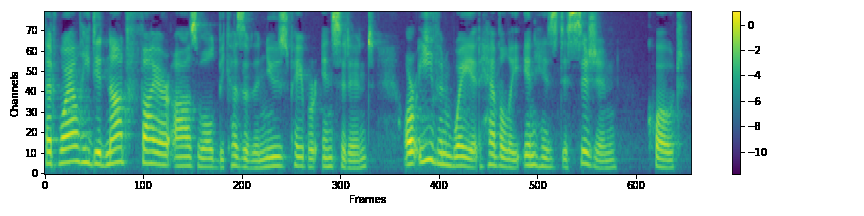

In [70]:
img

In [69]:
wav_path = '/data2/sungjaecho/data_tts/LJSpeech-1.1/wavs/LJ043-0105.wav'
melspec = get_mel(wav_path)
print(melspec.size())
print(melspec)
print(melspec.mean())
print(melspec.max())
print(melspec.min())
np_melspec = plot_spectrogram_to_numpy(melspec)
print(np_melspec.shape)
img = Image.fromarray(np_melspec, 'RGB')

tensor(22384.)
tensor(22384.)
tensor(-16965.)
tensor(1220.6700)
torch.Size([80, 657])
tensor([[-7.0417, -6.5725, -6.2653,  ..., -7.5106, -7.6705, -7.5644],
        [-6.8051, -6.1067, -6.0182,  ..., -7.0827, -7.2203, -7.1573],
        [-6.6287, -6.3140, -5.3506,  ..., -6.7084, -6.7569, -6.7958],
        ...,
        [-5.8540, -5.8237, -5.9861,  ..., -9.2722, -9.4126, -9.7848],
        [-5.6643, -5.6747, -5.7893,  ..., -9.1871, -9.5900, -9.9209],
        [-5.5067, -5.6368, -5.7028,  ..., -9.1625, -9.2752, -9.6159]])
tensor(-5.5760)
tensor(1.0915)
tensor(-11.7779)
(216, 864, 3)


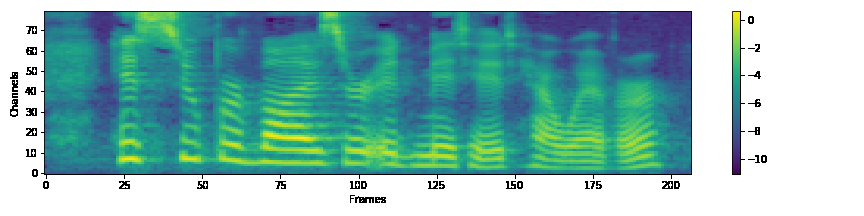

In [22]:
img

# Step-by-step comparison between EmoV-DB and LJSpeech

In [9]:
import numpy as np
import scipy
import IPython.display as ipd
max_wav_value=32768.0

22050
(52920,)
-0.00014806207


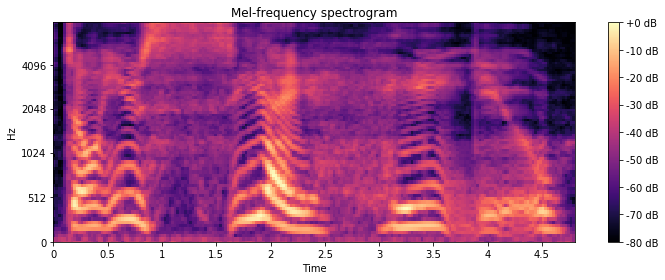

-0.00014805984
22050


In [10]:
wav_path = '/data2/sungjaecho/data_tts/EmoV-DB/EmoV-DB/bea/disgusted/disgusted_225-252_0236.wav'
sampling_rate, data = scipy.io.wavfile.read(wav_path)
print(sampling_rate)
print(data.shape)
print(np.mean(data))
y, sr = librosa.load(wav_path)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, n_mels=80, fmax=8000, hop_length=256)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
print(y.mean())
print(sr)
ipd.Audio(wav_path) # load a local WAV file

In [11]:
S.mean()

0.8133877299174364

In [12]:
S.shape

(80, 207)

In [13]:
S_dB.mean()

-47.012138714283786

22050
(191645,)
0.3470844530251246


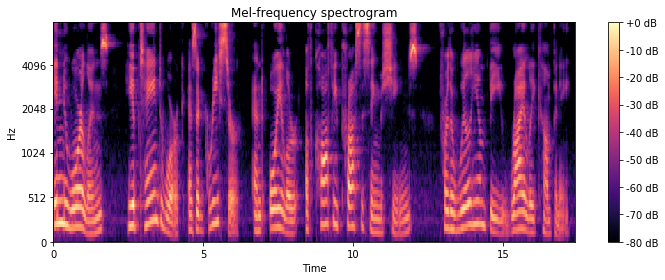

1.0592177e-05
22050


In [14]:
wav_path = '/data2/sungjaecho/data_tts/LJSpeech-1.1/wavs/LJ043-0109.wav'
sampling_rate, data = scipy.io.wavfile.read(wav_path)
print(sampling_rate)
print(data.shape)
print(np.mean(data))
y, sr = librosa.load(wav_path)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, n_mels=80, fmax=8000, hop_length=256)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
print(y.mean())
print(sr)
ipd.Audio(wav_path) # load a local WAV file

In [15]:
S.mean()

0.19126718100677828

In [16]:
S.shape

(80, 749)

In [17]:
S_dB.mean()

-56.97351977195062

# How to normalize WAV files.

In [30]:
from scipy.io.wavfile import read
from metadata import MetaData
import numpy as np

In [66]:
db = "ljspeech"
md = MetaData(db)
md.load_from_csv()
df = md.get_df()
absmean_list = list()
mean_list = list()
max_list = list()
min_list = list()
for i, row in df.iterrows():
    sampling_rate, data = read(row.wav_path)
    absmean_list.append(np.abs(data).mean())
    mean_list.append(data.mean())
    max_list.append(data.max())
    min_list.append(data.min())
    
print(db)
print("mean(mean(abs(values))) =", np.mean((absmean_list)))
print("mean(mean(values)) =", np.mean(mean_list))
print("max(max(values)) =", np.max(max_list))
print("max(min(values)) =", np.min(min_list))
print("mean(max(values)) =", np.mean(max_list))
print("mean(min(values)) =", np.mean(min_list))

ljspeech
mean(mean(abs(values))) = 1268.5078890667126
mean(mean(values)) = 0.30163567519410706
max(max(values)) = 32738
max(min(values)) = -32754
mean(max(values)) = 18933.53610687023
mean(min(values)) = -16062.160076335878


In [64]:
db = "emovdb"
md = MetaData(db)
md.load_from_csv()
df = md.get_df()
absmean_list = list()
mean_list = list()
max_list = list()
min_list = list()
for i, row in df.iterrows():
    sampling_rate, data = read(row.wav_path)
    absmean_list.append(np.abs(data).mean())
    mean_list.append(data.mean())
    max_list.append(data.max())
    min_list.append(data.min())
    
print(db)
print("mean(mean(abs(values))) =", np.mean((absmean_list)))
print("mean(mean(values)) =", np.mean(mean_list))
print("max(max(values)) =", np.max(max_list))
print("max(min(values)) =", np.min(min_list))
print("mean(max(values)) =", np.mean(max_list))
print("mean(min(values)) =", np.mean(min_list))

emovdb
mean(mean(abs(values))) = 405.1362480886695
mean(mean(values)) = -0.8367023325758854
max(max(values)) = 32767.0
max(min(values)) = -32768.0
mean(max(values)) = 6960.7383
mean(min(values)) = -6772.547


(array([5.323e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.567e+03]),
 array([2.7112801e-02, 3.2767244e+03, 6.5534219e+03, 9.8301191e+03,
        1.3106816e+04, 1.6383514e+04, 1.9660211e+04, 2.2936908e+04,
        2.6213605e+04, 2.9490303e+04, 3.2767000e+04], dtype=float32),
 <a list of 10 Patch objects>)

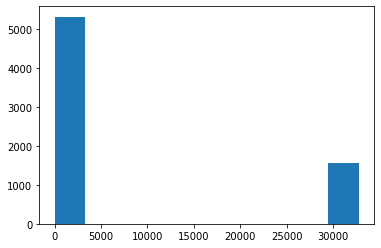

In [61]:
import matplotlib.pyplot as plt
plt.hist(max_list)